In [53]:
import numpy as np
import matplotlib.pyplot as plt
from worldModels import *
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import scipy.optimize
import scipy.io
import os.path
from utils import *
from run_simulations import *
from agents import *
import pickle

%matplotlib inline
%reload_ext autoreload
%autoreload 2


In [54]:
pswitchlst = np.linspace(0.01, 0.45, 15)
prewlst = np.linspace(0.55, 0.99, 10)

gammalst = np.linspace(0.01, 1.4, 25)
epslst = np.linspace(0.01, 0.5, 20)

betalst = 1 / np.linspace(0.05, 2, 20)

agent_type = 'inf-based' #'qlearning' or 'inf-based' or 'v-accumulation'

N_iters = 50
num_states = 2
obs_dim = 1
nblocks = 20 #1000 for 9.23 run #100
eps = 0
hmm_fit = False
sigmoid_window = 30
ntrials_per_block = [10, 40]
# ntrials_per_block = [10, 40]
seed = 0
np.random.seed(seed)

params = {'N_iters': N_iters, 'num_states': num_states, 'obs_dim': obs_dim, 
          'nblocks': nblocks, 'eps': eps, 'ntrials_per_block': ntrials_per_block,
          'gammalst': gammalst, 'epslst': epslst, 'seed': seed, 'type': agent_type, 'hmm_fit': hmm_fit,
         'pswitchlst': pswitchlst, 'prewlst': prewlst, 
          'betalst': betalst, 'seed': seed, 'sigmoid_window': sigmoid_window}


# for i in [0]: #range(10):
#     rlow = 0.05 * i
#     rhigh = 1 - 0.05 * i
#     print('Simulating rlow = %.2f, rhigh = %.2f' % (rlow, rhigh))
#     params['rlow'] = rlow
#     params['rhigh'] = rhigh


In [22]:
params['rlow'] = 0
params['rhigh'] = 1

agent, world, _, _, _, choicelst = run_single_agent(5,5,params)

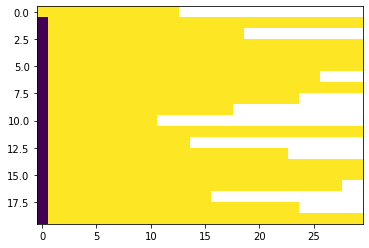

In [39]:
# Make measurements

plt.imshow(outcomeslst)

In [13]:
if world.rate_history[0][0] < 0.5: #first block starts with side 1 (right)
    print('one')

one


In [36]:
choicelst2 = split_by_trials(np.array(agent.choice_history), world.ntrialblocks[:-1], chop='max')
outcomeslst = split_by_trials(np.array(agent.outcome_history), world.ntrialblocks[:-1], chop='max')
outcomeslst = outcomeslst[:,:30]

In [37]:
np.nansum(outcomeslst, axis=1)

array([13., 29., 18., 29., 29., 29., 25., 29., 23., 17., 10., 29., 13.,
       22., 29., 29., 27., 15., 23., 29.])

In [43]:
# measure efficiencies
effblocks = np.nansum(outcomeslst, axis=1) / np.nansum(~np.isnan(outcomeslst), axis=1)

# measure nswitches
switchblocks = np.nansum(np.abs(np.diff(choicelst)), axis=1)

# measure switch points


In [46]:
np.diff?

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])